In [2]:
import pandas as pd

df1 = pd.read_csv("Filtered_Parks_Data.csv")
df1.head()

,OBJECTID,SITE_NAME,DISTRICT,ZonAgg,TypeLong
0,203,Billings Field,West Roxbury,Open Space District,"Parks, Playgrounds & Athletic Fields"
1,210,Draper Playground,West Roxbury,Open Space District,"Parks, Playgrounds & Athletic Fields"
2,218,West Roxbury H.S. Athletic Fields,West Roxbury,Institutional District,"Parks, Playgrounds & Athletic Fields"
3,257,Millennium Park I,West Roxbury,Open Space District,"Parks, Playgrounds & Athletic Fields"
4,266,Ohrenberger Play Area,West Roxbury,Residential District,"Parks, Playgrounds & Athletic Fields"


In [32]:
df2 = pd.read_csv("Open_Space_1.csv")
df2 = df2.loc[df2['TypeLong'] == 'Parks, Playgrounds & Athletic Fields']
print(df2.loc[df2['DISTRICT'] == 'Central Boston'])
df2 = df2.drop(['DISTRICT'], axis=1)
df2.head()

     OBJECTID                  SITE_NAME                      OWNERSHIP  \
32         33       DeFilippo Playground                 City of Boston   
35         36    Foster Street Play Area                 City of Boston   
36         37        Charter Street Park                 City of Boston   
38         39               Polcari Park                 City of Boston   
39         40               Cutillo Park                 City of Boston   
41         42      Norman Leventhal Park                        Private   
44         45               Langone Park                 City of Boston   
47         48              Tai Tung Park                 City of Boston   
303       304           North Point Park  Commonwealth of Massachusetts   
437       438         Elliot Norton Park                 City of Boston   
453       454  Christopher Columbus Park                 City of Boston   
463       464         Puopolo Playground                 City of Boston   
511       512            

,OBJECTID,SITE_NAME,OWNERSHIP,PROTECTION,TYPECODE,ACRES,ADDRESS,ZonAgg,TypeLong,OS_Own_Jur,...,ALT_NAME,AgncyJuris,PARK_ID,REGION,OS_ID,ZipCode,ParcelNumber,YearAcquired,ShapeSTArea,ShapeSTLength
1,2,James H. Roberts Playground,City of Boston,A97,3,1.004136,120 Hooker Str.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,...,Hooker-Sorrento Street Playground; Roberts Pla...,BPRD,156.0,PARK_Maintenance_Region 4,156,NaN,NaN,NaN,7446.922468,351.917171
2,3,Smith Playground,City of Boston,A97/LWCF,3,15.025247,235 Western Ave.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,...,NaN,BPRD,284.0,PARK_Maintenance_Region 4,284,NaN,NaN,NaN,111450.285756,1496.714522
4,5,Ringer Playground,City of Boston,A97/LWCF/USH,3,10.263093,NaN,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,...,NaN,BPRD,259.0,PARK_Maintenance_Region 4,259,NaN,NaN,NaN,76092.123126,1553.202129
5,6,McKinney Playground,City of Boston,A97/USH,3,5.891861,61-74 Faneuil Str.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,...,NaN,BPRD,193.0,PARK_Maintenance_Region 4,193,NaN,NaN,NaN,43689.012230,895.542804
6,7,Hobart Park,City of Boston,A97/LWCF,3,0.808914,Opposite 18 Ranlegh Rd.,Open Space District,"Parks, Playgrounds & Athletic Fields",BPRD,...,NaN,BPRD,154.0,PARK_Maintenance_Region 4,154,NaN,NaN,NaN,5998.389127,329.296598


In [13]:
df = df2.merge(df1)
df = df[['DISTRICT', 'ACRES']]
df

,DISTRICT,ACRES
0,Allston,1.004136
1,Allston,15.025247
2,Allston,10.263093
3,Brighton,5.891861
4,Brighton,0.808914
...,...,...
242,Roxbury,0.182374
243,South End,0.106896
244,Dorchester,0.340466
245,South Boston,0.381102


In [18]:
result = df.groupby('DISTRICT').sum()
df3 = pd.DataFrame(result.reset_index())
df3

,DISTRICT,ACRES
0,Allston,38.926205
1,Back Bay,70.116869
2,Brighton,56.688921
3,Central Boston,17.960829
4,Charlestown,46.184168
5,Dorchester,157.893824
6,East Boston,71.019179
7,Fenway,87.286213
8,Harbor Islands,111.525507
9,Hyde Park,248.320505


In [48]:
dfy = pd.read_csv('AQIthroughNeighborhood.csv')
dfy = dfy[['Name', 'NO2', 'O3', 'PM10', 'PM2.5','SO2', 'AQI']]
dfy

,Name,NO2,O3,PM10,PM2.5,SO2,AQI
0,Allston,24.231629,19.906124,27.688315,10.316910,0.232022,41.595506
1,Brighton,23.221051,20.088684,26.907099,10.012761,0.249334,39.829454
2,Dorchester,21.240612,20.798102,21.226487,9.759450,0.401907,38.749556
3,Back Bay,25.369122,19.696353,25.851348,11.155996,0.271823,43.772727
4,Bay Village,25.223408,19.764251,32.988801,8.177996,0.300487,39.200375
5,North End,24.227706,20.073876,27.392753,11.618539,0.280918,45.203184
6,Charlestown,16.956124,20.362060,16.986386,8.215375,0.260150,34.166667
7,East Boston,14.943712,20.887789,14.034153,7.843668,0.303367,32.587079
8,Fenway,26.461695,19.674448,31.078511,11.707743,0.237725,45.628277
9,Longwood Medical Area,23.434551,19.676685,31.163764,9.611461,0.227809,38.061798


In [53]:
merged_df = pd.merge(df3, dfy, left_on='DISTRICT', right_on='Name')
merged_df.drop(['Name'], axis = 1)

,DISTRICT,ACRES,NO2,O3,PM10,PM2.5,SO2,AQI
0,Allston,38.926205,24.231629,19.906124,27.688315,10.316910,0.232022,41.595506
1,Back Bay,70.116869,25.369122,19.696353,25.851348,11.155996,0.271823,43.772727
2,Brighton,56.688921,23.221051,20.088684,26.907099,10.012761,0.249334,39.829454
3,Charlestown,46.184168,16.956124,20.362060,16.986386,8.215375,0.260150,34.166667
4,Dorchester,157.893824,21.240612,20.798102,21.226487,9.759450,0.401907,38.749556
5,East Boston,71.019179,14.943712,20.887789,14.034153,7.843668,0.303367,32.587079
6,Fenway,87.286213,26.461695,19.674448,31.078511,11.707743,0.237725,45.628277
7,Harbor Islands,111.525507,12.616573,20.755955,9.265618,6.131517,0.371180,26.848315
8,Hyde Park,248.320505,16.883371,26.098090,22.787528,8.980169,0.364607,35.983146
9,Jamaica Plain,403.495012,22.943846,20.032161,28.809809,10.389854,0.352487,41.235581


In [54]:
pc = pd.read_csv("Parks_Counts.csv")
merged_df = pd.merge(merged_df, pc, left_on='DISTRICT', right_on='District')
merged_df = merged_df.drop(['District'], axis = 1)
merged_df

,DISTRICT,ACRES,Name,NO2,O3,PM10,PM2.5,SO2,AQI,Count
0,Allston,38.926205,Allston,24.231629,19.906124,27.688315,10.316910,0.232022,41.595506,9
1,Back Bay,70.116869,Back Bay,25.369122,19.696353,25.851348,11.155996,0.271823,43.772727,6
2,Brighton,56.688921,Brighton,23.221051,20.088684,26.907099,10.012761,0.249334,39.829454,13
3,Charlestown,46.184168,Charlestown,16.956124,20.362060,16.986386,8.215375,0.260150,34.166667,14
4,Dorchester,157.893824,Dorchester,21.240612,20.798102,21.226487,9.759450,0.401907,38.749556,39
5,East Boston,71.019179,East Boston,14.943712,20.887789,14.034153,7.843668,0.303367,32.587079,20
6,Fenway,87.286213,Fenway,26.461695,19.674448,31.078511,11.707743,0.237725,45.628277,2
7,Harbor Islands,111.525507,Harbor Islands,12.616573,20.755955,9.265618,6.131517,0.371180,26.848315,2
8,Hyde Park,248.320505,Hyde Park,16.883371,26.098090,22.787528,8.980169,0.364607,35.983146,15
9,Jamaica Plain,403.495012,Jamaica Plain,22.943846,20.032161,28.809809,10.389854,0.352487,41.235581,22


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


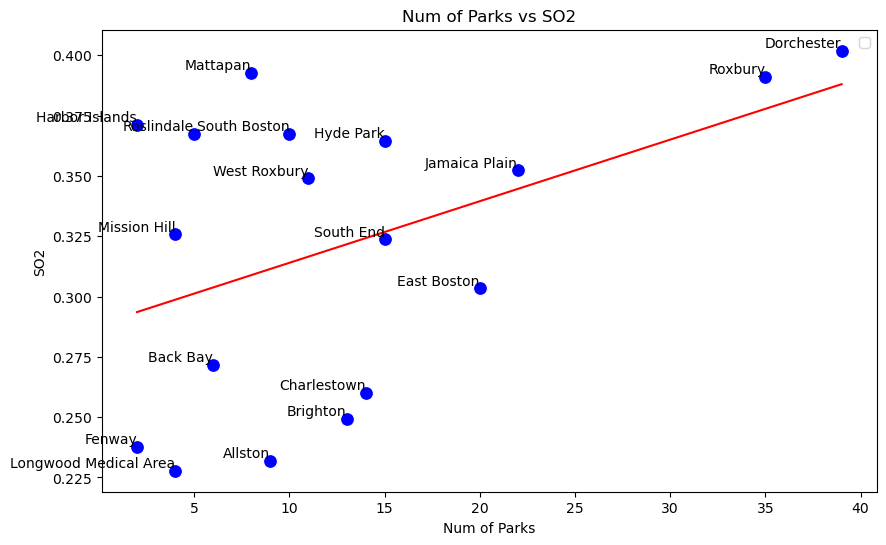

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Your DataFrame
# Assume merged_df is the DataFrame containing the data
# ...

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Count', y='SO2', data=merged_df, s=100, color='blue', edgecolor='w')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Count'], merged_df['SO2'])
line = np.linspace(min(merged_df['Count']), max(merged_df['Count']), 100)
plt.plot(line, intercept + slope * line, color='red')

# Label each point with the district name
for i, row in merged_df.iterrows():
    plt.text(row['Count'], row['SO2'], row['Name'], ha='right', va='bottom')

# Labels and title
plt.title('Num of Parks vs SO2')
plt.xlabel('Num of Parks')
plt.ylabel('SO2')
plt.legend()

# Display the plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


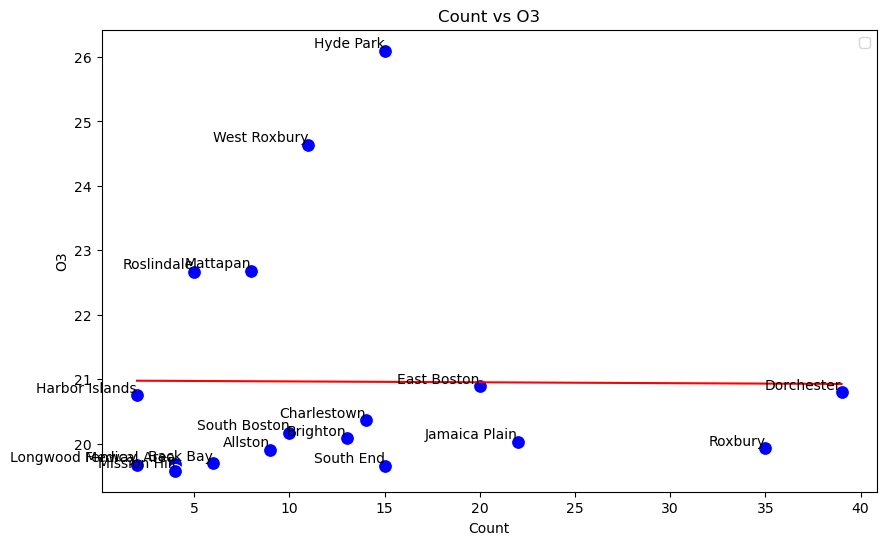

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Your DataFrame
# Assume merged_df is the DataFrame containing the data
# ...

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Count', y='O3', data=merged_df, s=100, color='blue', edgecolor='w')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['Count'], merged_df['O3'])
line = np.linspace(min(merged_df['Count']), max(merged_df['Count']), 100)
plt.plot(line, intercept + slope * line, color='red')

# Label each point with the district name
for i, row in merged_df.iterrows():
    plt.text(row['Count'], row['O3'], row['Name'], ha='right', va='bottom')

# Labels and title
plt.title('Count vs O3')
plt.xlabel('Count')
plt.ylabel('O3')
plt.legend()

# Display the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


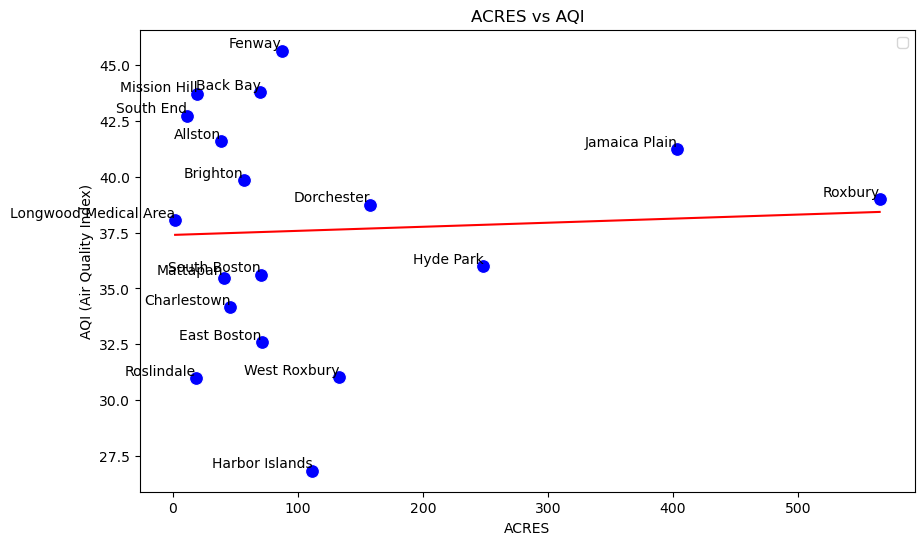

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

# Your DataFrame
# Assume merged_df is the DataFrame containing the data
# ...

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ACRES', y='AQI', data=merged_df, s=100, color='blue', edgecolor='w')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_df['ACRES'], merged_df['AQI'])
line = np.linspace(min(merged_df['ACRES']), max(merged_df['ACRES']), 100)
plt.plot(line, intercept + slope * line, color='red')

# Label each point with the district name
for i, row in merged_df.iterrows():
    plt.text(row['ACRES'], row['AQI'], row['Name'], ha='right', va='bottom')

# Labels and title
plt.title('ACRES vs AQI')
plt.xlabel('ACRES')
plt.ylabel('AQI (Air Quality Index)')
plt.legend()

# Display the plot
plt.show()

In [75]:
import geopandas as gpd

# Assuming you have a GeoDataFrame named neighborhoods_gdf
# ...
neighborhoods_gdf = gpd.read_file('census2020_bg_neighborhoods.json')

neighborhoods_gdf['Area'] = neighborhoods_gdf.geometry.area
neighborhoods_gdf

dfA = neighborhoods_gdf[['BlockGr202', 'Area']]
dfA
dfA.to_csv("Area.csv")

In [91]:
dfA = pd.read_csv("Area.csv")
dfA

,Unnamed: 0,BlockGr202,Area
0,0,Allston,4.154760e+07
1,1,Back Bay,1.538724e+07
2,2,Beacon Hill,7.891524e+06
3,3,Brighton,7.658156e+07
4,4,Charlestown,5.127021e+07
5,5,Chinatown,3.436019e+06
6,6,Dorchester,2.193038e+08
7,7,Downtown,2.159010e+07
8,8,East Boston,1.948618e+08
9,9,Fenway,4.281357e+07


In [93]:
merged_df2 = pd.merge(merged_df, dfA, left_on="DISTRICT", right_on="BlockGr202")

# Drop unnecessary columns
merged_df2 = merged_df2.drop(["DISTRICT"], axis=1)

# Display the resulting DataFrame
merged_df2.head()

,ACRES,Name,NO2,O3,PM10,PM2.5,SO2,AQI,Count,BlockGr202_x,Unnamed: 0,BlockGr202_y,Area
0,38.926205,Allston,24.231629,19.906124,27.688315,10.316910,0.232022,41.595506,9,NaN,0,Allston,4.154760e+07
1,70.116869,Back Bay,25.369122,19.696353,25.851348,11.155996,0.271823,43.772727,6,NaN,1,Back Bay,1.538724e+07
2,56.688921,Brighton,23.221051,20.088684,26.907099,10.012761,0.249334,39.829454,13,NaN,3,Brighton,7.658156e+07
3,46.184168,Charlestown,16.956124,20.362060,16.986386,8.215375,0.260150,34.166667,14,NaN,4,Charlestown,5.127021e+07
4,157.893824,Dorchester,21.240612,20.798102,21.226487,9.759450,0.401907,38.749556,39,NaN,6,Dorchester,2.193038e+08


In [133]:
combined_df = merged_df2[['Name', 'ACRES', 'SO2', 'NO2', 'O3','AQI', 'PM2.5', 'PM10', 'Count', 'Area']]
combined_df['ratio'] = result['Area'] / result['ACRES']
combined_df

/var/folders/c2/fd39j6zs37zbn5z7mh8rph140000gn/T/ipykernel_94582/2159480271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['ratio'] = result['Area'] / result['ACRES']


,Name,ACRES,SO2,NO2,O3,AQI,PM2.5,PM10,Count,Area,ratio
0,Allston,38.926205,0.232022,24.231629,19.906124,41.595506,10.316910,27.688315,9,4.154760e+07,1.067343e+06
1,Back Bay,70.116869,0.271823,25.369122,19.696353,43.772727,11.155996,25.851348,6,1.538724e+07,2.194514e+05
2,Brighton,56.688921,0.249334,23.221051,20.088684,39.829454,10.012761,26.907099,13,7.658156e+07,1.350909e+06
3,Charlestown,46.184168,0.260150,16.956124,20.362060,34.166667,8.215375,16.986386,14,5.127021e+07,1.110125e+06
4,Dorchester,157.893824,0.401907,21.240612,20.798102,38.749556,9.759450,21.226487,39,2.193038e+08,1.388932e+06
5,East Boston,71.019179,0.303367,14.943712,20.887789,32.587079,7.843668,14.034153,20,1.948618e+08,2.743791e+06
6,Fenway,87.286213,0.237725,26.461695,19.674448,45.628277,11.707743,31.078511,2,4.281357e+07,4.904964e+05
7,Harbor Islands,111.525507,0.371180,12.616573,20.755955,26.848315,6.131517,9.265618,2,9.323786e+07,8.360228e+05
8,Hyde Park,248.320505,0.364607,16.883371,26.098090,35.983146,8.980169,22.787528,15,1.392618e+08,5.608148e+05
9,Jamaica Plain,403.495012,0.352487,22.943846,20.032161,41.235581,10.389854,28.809809,22,1.133604e+08,2.809463e+05


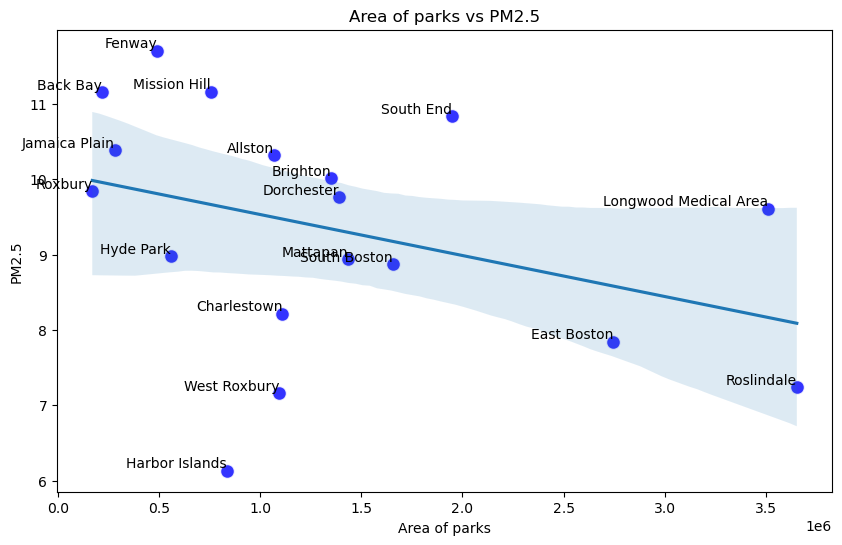

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

# Your DataFrame
# Assume df is the DataFrame containing the data
df = combined_df

# Scatter plot with regression line and confidence bands
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='ratio', y='PM2.5', data=df, scatter_kws={'s': 100, 'color': 'blue', 'edgecolor': 'w'}, ci=95)

# Label each point with the district name
for i, row in df.iterrows():
    ax.text(row['ratio'], row['PM2.5'], row['Name'], ha='right', va='bottom')

# Labels and title
plt.title('Area of parks vs PM2.5')
plt.xlabel('Area of parks')
plt.ylabel('PM2.5')

# Display the plot
plt.show()